<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/projects/Classification(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

In [ ]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
X[0].shape

(784,)

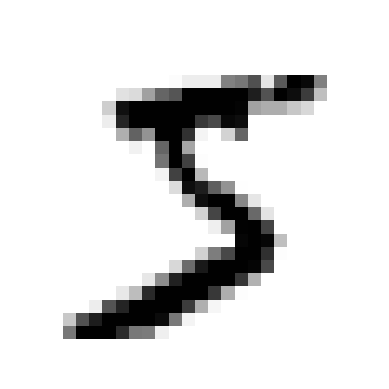

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(X):
    X = X.reshape(28, 28)
    plt.imshow(X, cmap = 'binary')
    plt.axis('off')

plot_digit(X[0])

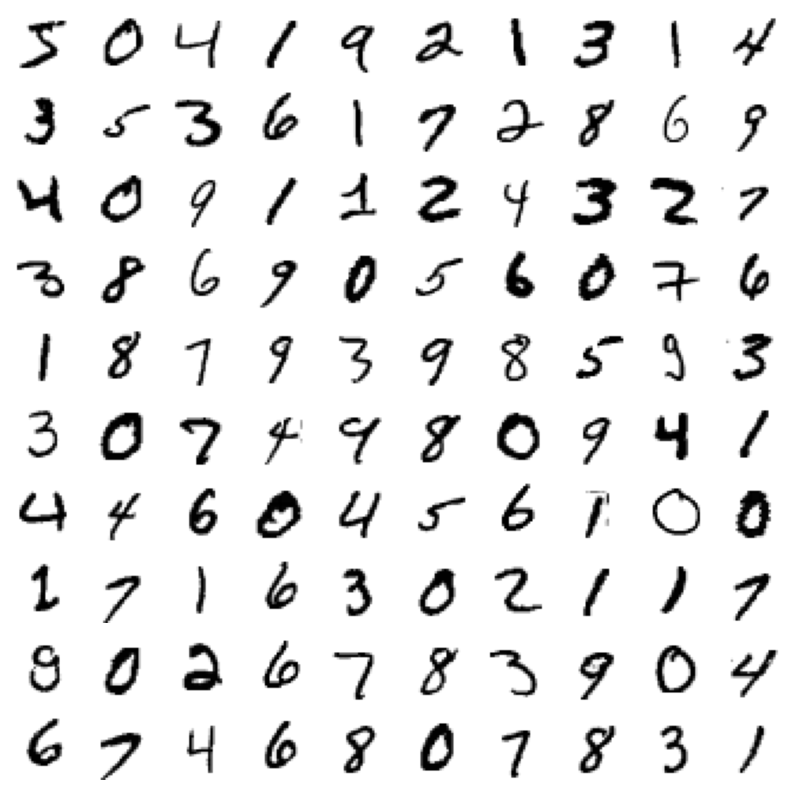

In [ ]:
plt.figure(figsize = (10, 10))
for idx, image in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

'3'

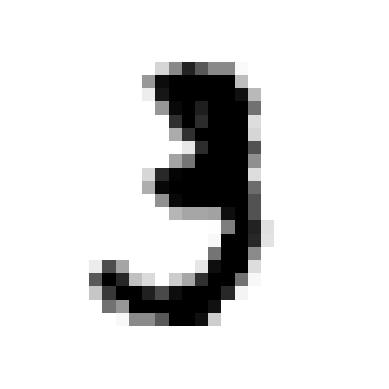

In [ ]:
plot_digit(X_train[10])
y_train[10]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.score(X_test, y_test_5)

0.9492

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
sgd_clf.predict(X[[0]])

array([ True])

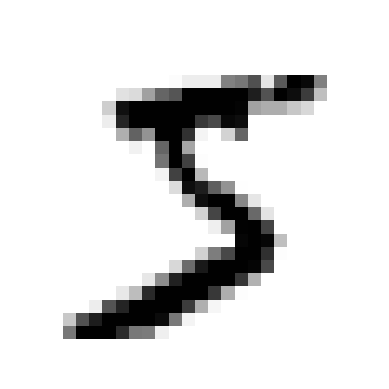

In [ ]:
plot_digit(X[0])

In [ ]:
sgd_clf.predict(X[[1]])

array([False])

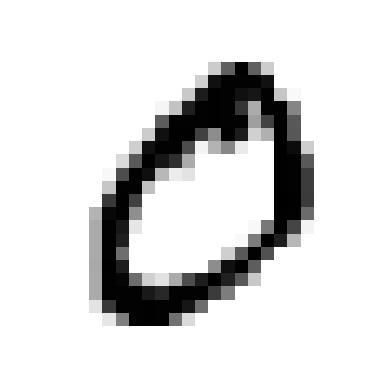

In [ ]:
plot_digit(X[1])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train_5)
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3)

array([0.90965, 0.90965, 0.90965])

In [ ]:
import pandas as pd

pd.Series(y_train_5).value_counts() / len(y_train_5)

,count
False,0.90965
True,0.09035


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

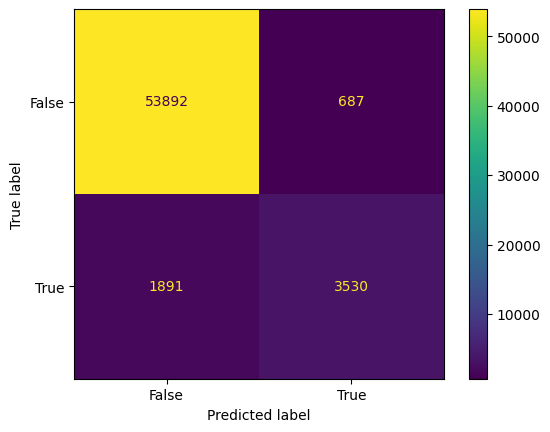

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
cm[1, 1] / (cm[1, 1] + cm[0, 1])

0.8370879772350012

In [ ]:
cm[1, 1] / (cm[1, 1] + cm[1, 0])

0.6511713705958311

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
sgd_clf.decision_function(X[[100]])

array([1854.68328897])

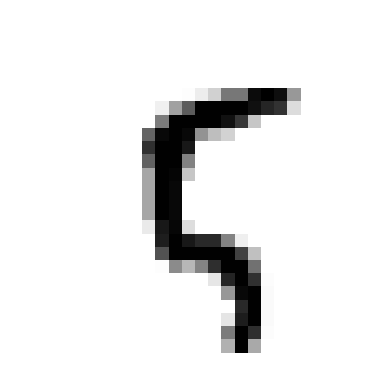

In [ ]:
plot_digit(X[100])

In [ ]:
y_preds = cross_val_predict(sgd_clf, X_train, y_train_5, method = 'decision_function', cv = 3)
y_preds

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_preds)

In [ ]:
y_train_5[-3]

True

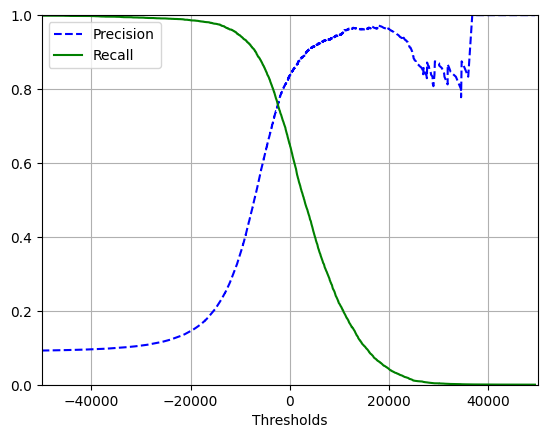

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Thresholds')
plt.legend()
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.show()

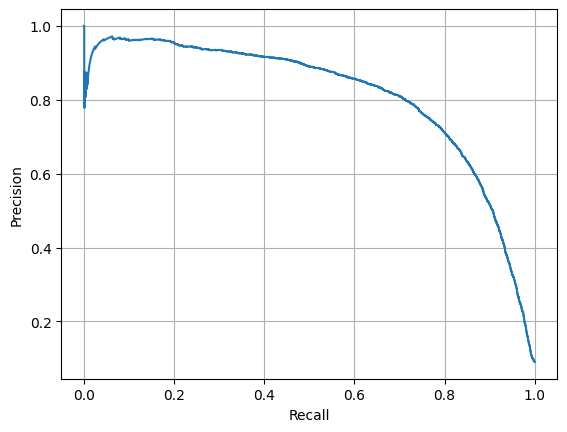

In [ ]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_preds)

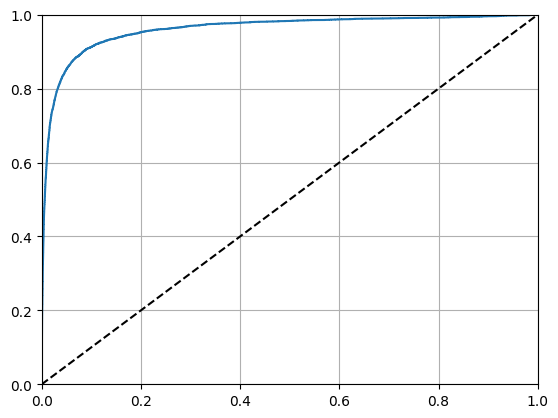

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.grid()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_preds)

0.9604938554008616

In [ ]:
idx_for_90_precision = (precisions >= 0.8).argmax()
idx_for_90_precision

55170

In [ ]:
thresholds_for_90_precision = thresholds[idx_for_90_precision]
thresholds_for_90_precision

IndexError: index 55170 is out of bounds for axis 0 with size 3908

In [ ]:
precisions[idx_for_90_precision]

In [ ]:
y_train_pred_90 = y_preds > thresholds_for_90_precision
y_train_pred_90

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score(y_train_5, y_train_pred_90)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train_5)
forest_clf.predict_proba(X_train[[0]])

In [ ]:
y_preds_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')
y_preds_forest

In [ ]:
y_prob_preds_forest = y_preds_forest[:, 1]
y_prob_preds_forest

In [ ]:
y_preds_forest = y_prob_preds_forest >= 0.3

In [ ]:
y_preds_forest

In [ ]:
precision_score(y_train_5, y_preds_forest)

In [ ]:
recall_score(y_train_5, y_preds_forest)

In [ ]:
f1_score(y_train_5, y_preds_forest)

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_prob_preds_forest)

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Thresholds')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve

fpr_forest, tpr_forest, thresholds_roc = roc_curve(y_train_5, y_prob_preds_forest)

In [ ]:
plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()

In [ ]:
roc_auc_score(y_train_5, y_prob_preds_forest)

## Multiclass Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state = 42)
rnd_clf.fit(X_train, y_train)
cross_val_score(rnd_clf, X_train, y_train, cv = 3)

array([0.9646 , 0.96255, 0.9666 ])

In [ ]:
rnd_clf.predict(X_test[:5])

array(['7', '2', '1', '0', '4'], dtype=object)

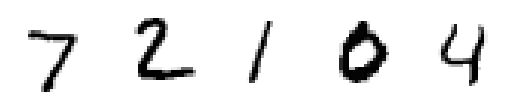

In [ ]:
for idx, image in enumerate(X_test[:5]):
    plt.subplot(1, 5, idx + 1)
    plot_digit(image)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:2000], y_train[:2000])
svm_clf.predict(X_test[:5])

array(['7', '2', '1', '0', '4'], dtype=object)

In [ ]:
# OvR/OvA -> One versus Rest/One versus All
# OvO -> One versus One

In [ ]:
# 100, 900
# 100, 900
# cox model uzerinde

# 100, 100
# 100, 100
# az model uzerinde

In [ ]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC())

In [ ]:
sgd_clf = SGDClassifier(random_state = 42)

cross_val_score(sgd_clf, X_train[:2000], y_train[:2000], cv = 3)

array([0.84857571, 0.80809595, 0.84084084])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cross_val_score(sgd_clf, X_train_scaled[:2000], y_train[:2000], cv = 3)

array([0.84857571, 0.82008996, 0.85885886])

#Multilabel Classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype(int) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

NameError: name 'y_train' is not defined

In [ ]:
knn_clf.predict([X_test[10]])

In [ ]:
plot_digit(X_test[10])

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
plt.subplot(121)
plot_digit(X_train_mod[0])
plt.subplot(122)
plot_digit(y_train_mod[0])

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)

In [ ]:
idx = 102
plt.subplot(131)
plt.title('Original image:')
plot_digit(y_test_mod[idx])
plt.subplot(132)
plt.title('Modified input image:')
plot_digit(X_test_mod[idx])
plt.subplot(133)
plt.title('Predicted image:')
plot_digit(knn_clf.predict([X_test_mod[idx]]))